<a href="https://colab.research.google.com/github/Saipraneeth99/DeepLearning/blob/main/1-1.2MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchsummary import summary
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000, shuffle=True)



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the CNN model
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
model = ConvNet()




In [ ]:
# model.to('cuda')
summary(model,input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 24, 24]             260
            Conv2d-2             [-1, 20, 8, 8]           5,020
            Linear-3                   [-1, 50]          16,050
            Linear-4                   [-1, 10]             510
Total params: 21,840
Trainable params: 21,840
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.08
Estimated Total Size (MB): 0.14
----------------------------------------------------------------


In [ ]:
class ConvNet2(nn.Module):
    def __init__(self):
        super(ConvNet2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2)
        self.fc1 = nn.Linear(7 * 7 * 64, 16)
        self.fc2 = nn.Linear(16, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 7 * 7 * 64)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
model2 = ConvNet2()

In [ ]:
# class CNN3(nn.Module):
#     def __init__(self):
#         super(CNN, self).__init__()
#         self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
#         self.fc1 = nn.Linear(160, 100)
#         self.fc2 = nn.Linear(100, 50)
#         self.fc3 = nn.Linear(50, 10)

#     def forward(self, x):
#         x = F.relu(F.max_pool2d(self.conv1(x), 2))
#         x = x.view(-1, 160)
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return F.log_softmax(x, dim=1)
# model3 = CNN3()

In [ ]:
# model.to('cuda')
summary(model2,input_size = (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
            Conv2d-2           [-1, 64, 14, 14]          51,264
            Linear-3                   [-1, 16]          50,192
            Linear-4                   [-1, 10]             170
Total params: 102,458
Trainable params: 102,458
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.29
Params size (MB): 0.39
Estimated Total Size (MB): 0.68
----------------------------------------------------------------


In [ ]:
# Define a loss function and optimizer
# model = model.to(torch.device('cuda'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.5)
losses_1 = []
accuracies_1 = []
for epoch in range(10):
    correct = 0
    total = 0
    total_loss = 0
    for batch_idx, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_loss = total_loss + loss.item()
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(images), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
    losses_1.append(total_loss/total)
    accuracies_1.append(100 * correct / total)
    


Train Epoch: 0 [29984/60000 (100%)]	Loss: 0.062816
Train Epoch: 1 [29984/60000 (100%)]	Loss: 0.050412
Train Epoch: 2 [29984/60000 (100%)]	Loss: 0.003344
Train Epoch: 3 [29984/60000 (100%)]	Loss: 0.022235
Train Epoch: 4 [29984/60000 (100%)]	Loss: 0.042992
Train Epoch: 5 [29984/60000 (100%)]	Loss: 0.043229
Train Epoch: 6 [29984/60000 (100%)]	Loss: 0.054775
Train Epoch: 7 [29984/60000 (100%)]	Loss: 0.126852
Train Epoch: 8 [29984/60000 (100%)]	Loss: 0.107468
Train Epoch: 9 [29984/60000 (100%)]	Loss: 0.159061


In [ ]:
# Define a loss function and optimizer
# model = model.to(torch.device('cuda'))
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model2.parameters(), lr=0.001, momentum=0.5)
losses_2 = []
accuracies_2 = []
for epoch in range(10):
    correct = 0
    total = 0
    total_loss = 0
    for batch_idx, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        outputs = model2(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        total_loss = total_loss + loss.item()
    print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(images), len(trainloader.dataset),
        100. * batch_idx / len(trainloader), loss.item()))
    losses_2.append(total_loss/total)
    accuracies_2.append(100 * correct / total)
    


Train Epoch: 0 [29984/60000 (100%)]	Loss: 0.033093
Train Epoch: 1 [29984/60000 (100%)]	Loss: 0.162822
Train Epoch: 2 [29984/60000 (100%)]	Loss: 0.118904
Train Epoch: 3 [29984/60000 (100%)]	Loss: 0.164148
Train Epoch: 4 [29984/60000 (100%)]	Loss: 0.167154
Train Epoch: 5 [29984/60000 (100%)]	Loss: 0.046410
Train Epoch: 6 [29984/60000 (100%)]	Loss: 0.035432
Train Epoch: 7 [29984/60000 (100%)]	Loss: 0.015700
Train Epoch: 8 [29984/60000 (100%)]	Loss: 0.016110
Train Epoch: 9 [29984/60000 (100%)]	Loss: 0.044546


In [ ]:
# # Define a loss function and optimizer
# # model = model.to(torch.device('cuda'))
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model3.parameters(), lr=0.001, momentum=0.5)
# losses_3 = []
# accuracies_3 = []
# for epoch in range(10):
#     correct = 0
#     total = 0
#     total_loss = 0
#     for batch_idx, (images, labels) in enumerate(trainloader):
#         optimizer.zero_grad()
#         outputs = model3(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()
#         total_loss = total_loss + loss.item()
#     print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
#         epoch, batch_idx * len(images), len(trainloader.dataset),
#         100. * batch_idx / len(trainloader), loss.item()))
#     losses_3.append(total_loss/total)
#     accuracies_3.append(100 * correct / total)
    


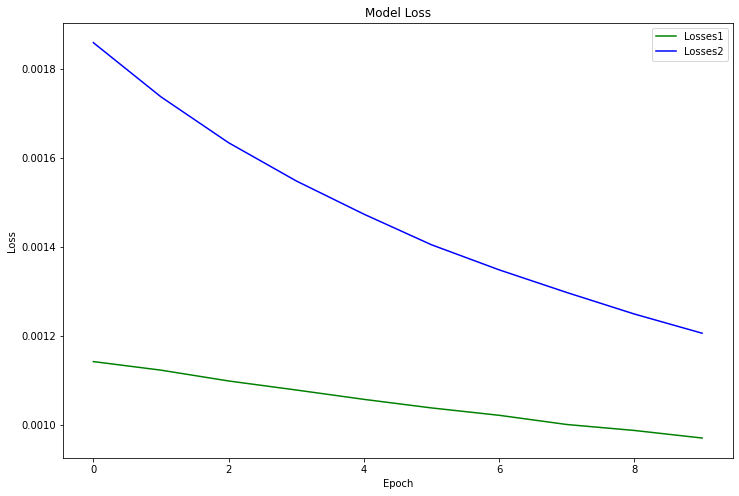

In [ ]:
# Plot the loss over time
fig, ax = plt.subplots(figsize=(12, 8))
# ax.plot(losses)
ax.set_title('Model Loss')
ax.plot(losses_1, 'g', label='Losses1')
ax.plot(losses_2, 'b', label='Losses2')

ax.legend()

ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
plt.show()

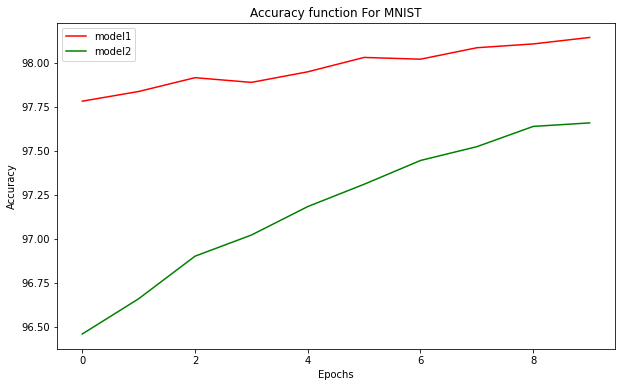

In [ ]:
plt1=plt.figure(figsize=(10, 6))
plt.plot(accuracies_1, 'r', label='model1')
plt.plot(accuracies_2, 'g', label='model2')

plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.title("Accuracy function For MNIST")
plt.show()